In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import os

current_path = os.getcwd()
data_folder_path = os.path.join(current_path, "data")

In [3]:
data_csv_path = os.path.join(data_folder_path, "data.csv")
df = pd.read_csv(data_csv_path)
df

,id_renabap,geometry,renabap_id,nombre_barrio,provincia,departamento,localidad,cantidad_viviendas_aproximadas,cantidad_familias_aproximada,decada_de_creacion,...,oficio_actividad_construccion_afines,oficio_actividad_elaboracion_de_comidas,oficio_actividad_cartonero_carrero_afines,oficio_actividad_trabajos_domesticos_y_cuidado,oficio_actividad_comunitarias,oficio_actividad_produccion_agropecuaria,oficio_actividad_via_publica_venta_de_productos_y_servicios,oficio_actividad_otros,oficio_actividad_ns_nc,oficio_actividad_transportista
0,1,MULTIPOLYGON (((-58.83350090114561 -34.4812767...,1,Monterrey I,Buenos Aires,Pilar,Presidente Derqui,40.0,44.0,Década 1990,...,6,1,4,0,0,0,6,1,1,0
1,2,MULTIPOLYGON (((-58.01200048352921 -34.9473196...,2,Malvinas II,Buenos Aires,La Plata,José Melchor Romero,290.0,319.0,Década 1990,...,103,9,0,5,0,0,15,18,9,1
2,3,MULTIPOLYGON (((-58.07980353023293 -35.0350737...,3,Ferroviario,Buenos Aires,La Plata,Angel Etcheverry,133.0,146.0,Década 2000,...,4,1,0,0,0,14,2,51,2,1
3,4,MULTIPOLYGON (((-57.97991397438435 -34.9083356...,4,La Favelita,Buenos Aires,La Plata,Tolosa,122.0,134.0,Década 1970,...,0,0,0,0,0,0,0,0,0,0
4,5,MULTIPOLYGON (((-58.06297036682039 -34.9013418...,5,Casaca,Buenos Aires,La Plata,City Bell,20.0,22.0,Década 2000,...,1,0,0,0,0,0,0,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5682,6049,MULTIPOLYGON (((-65.50319405299618 -26.2476513...,6049,Ampliación Bancaria,Tucumán,Trancas,San Pedro De Colalao,44.0,48.0,Década 2010,...,0,0,0,0,0,0,0,0,0,0
5683,6050,MULTIPOLYGON (((-65.50501834975279 -26.2469829...,6050,La Esperanza,Tucumán,Trancas,San Pedro De Colalao,100.0,110.0,Década 2010,...,0,0,0,0,0,0,0,0,0,0
5684,6051,MULTIPOLYGON (((-65.49484225523555 -26.2249521...,6051,Costanera,Tucumán,Trancas,San Pedro De Colalao,35.0,39.0,Década 2010,...,0,0,0,0,0,0,0,0,0,0
5685,6052,MULTIPOLYGON (((-65.27575508750162 -26.2210999...,6052,Villa Vieja,Tucumán,Trancas,Villa De Trancas,100.0,110.0,Década 1970,...,0,0,0,0,0,0,0,0,0,0


## Análisis de Mendoza
1. Limpieza de datos
    1.1. Eliminación de datos duplicados y nulos
    1.2. Dimensionamiento
    1.3. Análisis de datos característicos
    1.4. Medidas de tendencia central
2. Procesamiento y análisis de datos
    2.1 ¿Cuál es el departamento con el mayor número de barrios populares inscriptos en el registro?

### Limpieza de datos


In [9]:
# Obtencion de la información de Mendoza

mendoza_data = df[df['provincia'] == 'Mendoza']
mendoza_data.head(20)

,id_renabap,geometry,renabap_id,nombre_barrio,provincia,departamento,localidad,cantidad_viviendas_aproximadas,cantidad_familias_aproximada,decada_de_creacion,...,oficio_actividad_construccion_afines,oficio_actividad_elaboracion_de_comidas,oficio_actividad_cartonero_carrero_afines,oficio_actividad_trabajos_domesticos_y_cuidado,oficio_actividad_comunitarias,oficio_actividad_produccion_agropecuaria,oficio_actividad_via_publica_venta_de_productos_y_servicios,oficio_actividad_otros,oficio_actividad_ns_nc,oficio_actividad_transportista
2994,3274,"MULTIPOLYGON (((-68.682203 -32.863817, -68.680...",3274,Grilli,Mendoza,Guaymallén,Los Corralitos,400.0,440.0,Década 1970,...,51,5,14,0,3,41,14,45,5,6
2995,3275,MULTIPOLYGON (((-68.67473300911455 -32.8888267...,3275,Las Chipicas,Mendoza,Guaymallén,Puente De Hierro,32.0,35.0,Década 2000,...,13,1,0,0,0,6,3,10,3,0
2996,3276,"MULTIPOLYGON (((-68.68555600000001 -32.996078,...",3276,Cuadro Estación,Mendoza,Maipú,Rodeo Del Medio,20.0,22.0,Década 2000,...,0,1,0,0,0,1,0,9,0,0
2997,3277,MULTIPOLYGON (((-68.84742086506549 -32.8351490...,3277,Urbanizadora del Oeste 2,Mendoza,Las Heras,Las Heras,30.0,33.0,Década 2000,...,5,0,1,0,0,0,1,4,1,0
2998,3278,MULTIPOLYGON (((-68.81342537257528 -32.8401844...,3278,San Martín Fabrega,Mendoza,Las Heras,Las Heras,13.0,14.0,Década 1990,...,1,0,0,0,0,0,0,7,0,0
2999,3279,MULTIPOLYGON (((-68.83513834672482 -32.8353394...,3279,Por un futuro mejor,Mendoza,Las Heras,Panquehua,50.0,55.0,Década 1990,...,14,3,0,0,0,0,2,10,9,0
3000,3280,MULTIPOLYGON (((-68.82552908588779 -32.8002944...,3280,Callejón González y San Martín,Mendoza,Las Heras,Las Heras,12.0,13.0,Década 1990,...,0,0,1,0,0,0,1,0,0,0
3001,3281,MULTIPOLYGON (((-68.8277518091667 -32.82395991...,3281,Todos Unidos,Mendoza,Las Heras,Las Heras,100.0,110.0,Década 2000,...,21,2,10,1,1,2,4,7,3,1
3002,3282,MULTIPOLYGON (((-68.77076961631742 -32.8021177...,3282,Ruta 40,Mendoza,Las Heras,El Borbollón,33.0,36.0,Década 1940,...,9,2,5,0,0,3,1,7,2,0
3003,3283,MULTIPOLYGON (((-68.7680477543111 -32.83681128...,3283,Portal del Algarrobal,Mendoza,Las Heras,Las Heras,450.0,495.0,Década 2000,...,146,18,3,0,0,20,21,48,23,8


In [5]:
# 1.1 Limpieza de Datos

mendoza_data = mendoza_data.drop_duplicates() #Eliminamos duplicados
mendoza_data = mendoza_data.dropna() #Eliminamos filas que contengan al menos un valor nulo

In [6]:
# 1.2 Dimensionamiento: Cantidad de datos del dataset:

mendoza_data.shape

(97, 77)

In [7]:
# 1.3 Análisis de datos característicos

mendoza_data.describe()

,id_renabap,renabap_id,cantidad_viviendas_aproximadas,cantidad_familias_aproximada,anio_de_creacion,superficie_m2,personas_genero_masc,personas_genero_fem,personas_genero_otrx,responsable_genero_masc,...,oficio_actividad_construccion_afines,oficio_actividad_elaboracion_de_comidas,oficio_actividad_cartonero_carrero_afines,oficio_actividad_trabajos_domesticos_y_cuidado,oficio_actividad_comunitarias,oficio_actividad_produccion_agropecuaria,oficio_actividad_via_publica_venta_de_productos_y_servicios,oficio_actividad_otros,oficio_actividad_ns_nc,oficio_actividad_transportista
count,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,...,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000
mean,4391.432990,4391.432990,51.525773,56.783505,2013.546392,49424.865979,57.268041,60.515464,0.041237,9.350515,...,6.494845,0.690722,0.659794,0.391753,0.237113,3.896907,0.618557,4.804124,1.092784,0.164948
std,909.393558,909.393558,51.483633,56.623432,2.371799,61114.347139,74.652879,81.376455,0.199871,13.448235,...,10.358293,1.716105,1.908788,1.396101,0.887097,7.788192,1.349717,7.574132,2.354439,0.571555
min,3292.000000,3292.000000,8.000000,9.000000,2010.000000,2667.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3402.000000,3402.000000,17.000000,19.000000,2012.000000,15575.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4438.000000,4438.000000,35.000000,39.000000,2013.000000,26234.000000,31.000000,35.000000,0.000000,4.000000,...,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,5472.000000,5472.000000,65.000000,72.000000,2015.000000,48779.000000,89.000000,86.000000,0.000000,16.000000,...,8.000000,1.000000,0.000000,0.000000,0.000000,5.000000,1.000000,6.000000,1.000000,0.000000
max,5510.000000,5510.000000,327.000000,360.000000,2018.000000,321552.000000,366.000000,389.000000,1.000000,70.000000,...,50.000000,13.000000,13.000000,9.000000,6.000000,47.000000,7.000000,40.000000,16.000000,4.000000


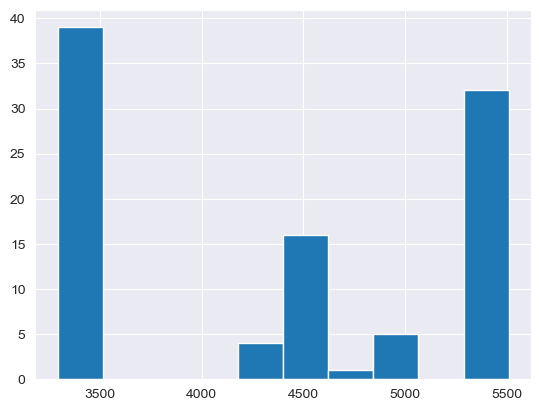

In [8]:
# Visualizamos los datos y su distribución

mendoza_data['id_renabap'].hist()
plt.show()

In [46]:
# Medidas de tendencia central
#   Media
mendoza_data.mean(numeric_only=True)

id_renabap                                                     4021.694006
renabap_id                                                     4021.694006
cantidad_viviendas_aproximadas                                   70.936909
cantidad_familias_aproximada                                     78.123028
anio_de_creacion                                               2013.546392
                                                                  ...     
oficio_actividad_produccion_agropecuaria                          4.075710
oficio_actividad_via_publica_venta_de_productos_y_servicios       1.151420
oficio_actividad_otros                                            6.599369
oficio_actividad_ns_nc                                            1.993691
oficio_actividad_transportista                                    0.302839
Length: 64, dtype: float64

In [47]:
# Medidas de tendencia central
#   Mediana
mendoza_data.median(numeric_only=True)

id_renabap                                                     3443.0
renabap_id                                                     3443.0
cantidad_viviendas_aproximadas                                   45.0
cantidad_familias_aproximada                                     50.0
anio_de_creacion                                               2013.0
                                                                ...  
oficio_actividad_produccion_agropecuaria                          0.0
oficio_actividad_via_publica_venta_de_productos_y_servicios       0.0
oficio_actividad_otros                                            3.0
oficio_actividad_ns_nc                                            0.0
oficio_actividad_transportista                                    0.0
Length: 64, dtype: float64

### Procesamiento y análisis de datos

Procedemos a filtar los datos para poder analizar en detalle.

#### ¿Cuál es el departamento con el mayor número de barrios populares inscriptos en el registro?

In [16]:
# Agrupar los datos por departamento y contar el número de registros en cada grupo:
departamento_counts = mendoza_data.groupby('departamento')['nombre_barrio'].value_counts()
pd.set_option('display.max_rows', None)
print(departamento_counts)

# Obtener el departamento con el mayor número de barrios populares inscriptos:
departamento_max = departamento_counts.idxmax()

print("El departamento con el mayor número de barrios populares inscriptos es:", departamento_max)
departamento_counts

departamento    nombre_barrio                 
Capital         Alto Ceferino                     1
                Anexo Los Consorcios              1
                Asociación Civil del Pedemonte    1
                Barranco                          1
                Barrio Andino                     1
                Barrio Cipolleti                  1
                Barrio Flores                     1
                Barrio San Martín                 1
                Catorce de Noviembre              1
                Colina                            1
                Difunta Correa                    1
                El Eden                           1
                El Triángulo                      1
                Favorita Nueva                    1
                Kilimanyaro                       1
                Libertadores                      1
                Malargüe                          1
                Olivares                          1
                P

departamento    nombre_barrio                 
Capital         Alto Ceferino                     1
                Anexo Los Consorcios              1
                Asociación Civil del Pedemonte    1
                Barranco                          1
                Barrio Andino                     1
                Barrio Cipolleti                  1
                Barrio Flores                     1
                Barrio San Martín                 1
                Catorce de Noviembre              1
                Colina                            1
                Difunta Correa                    1
                El Eden                           1
                El Triángulo                      1
                Favorita Nueva                    1
                Kilimanyaro                       1
                Libertadores                      1
                Malargüe                          1
                Olivares                          1
                P

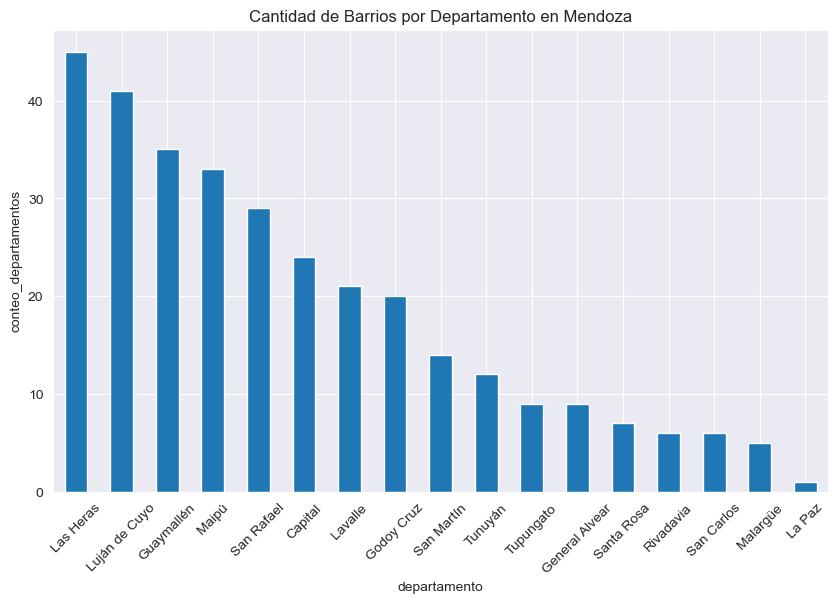

In [17]:
# Se grafica el resultado obtenido

conteo_barrios = mendoza_data['departamento'].value_counts()

#   Crear el gráfico de barras
plt.figure(figsize=(10, 6))
conteo_barrios.plot(kind='bar')
plt.xlabel('departamento')
plt.ylabel('conteo_departamentos')
plt.title('Cantidad de Barrios por Departamento en Mendoza')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mayor legibilidad

plt.show()

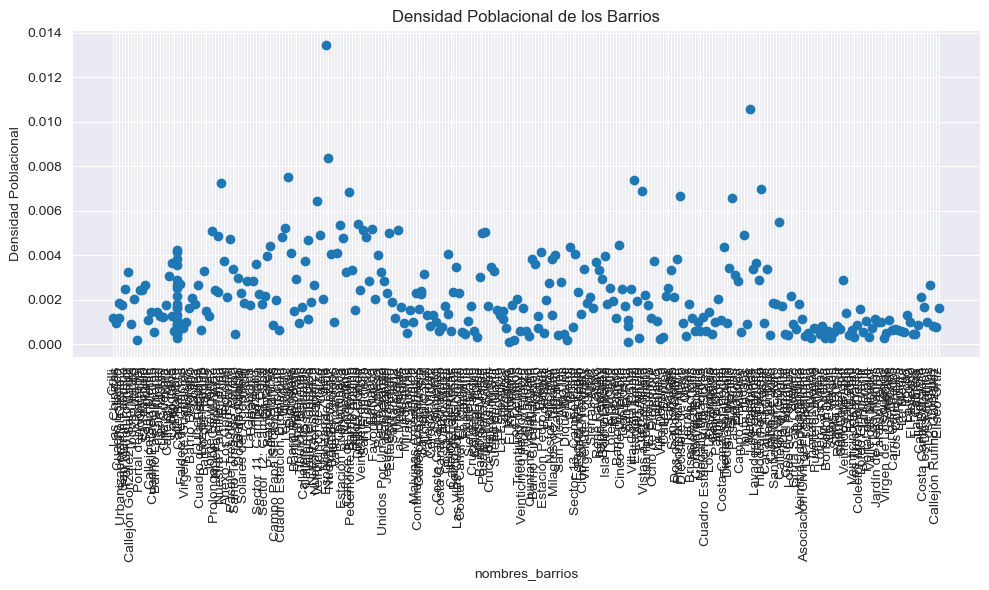

In [20]:
# Densidad poblacional

#Definimos la densidad poblacional
densidad_poblacional = mendoza_data['cantidad_familias_aproximada'] / mendoza_data['superficie_m2']
nombres_barrios = mendoza_data['nombre_barrio']

# Crear el scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(nombres_barrios, densidad_poblacional)
plt.xlabel('nombres_barrios')
plt.ylabel('Densidad Poblacional')
plt.title('Densidad Poblacional de los Barrios')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

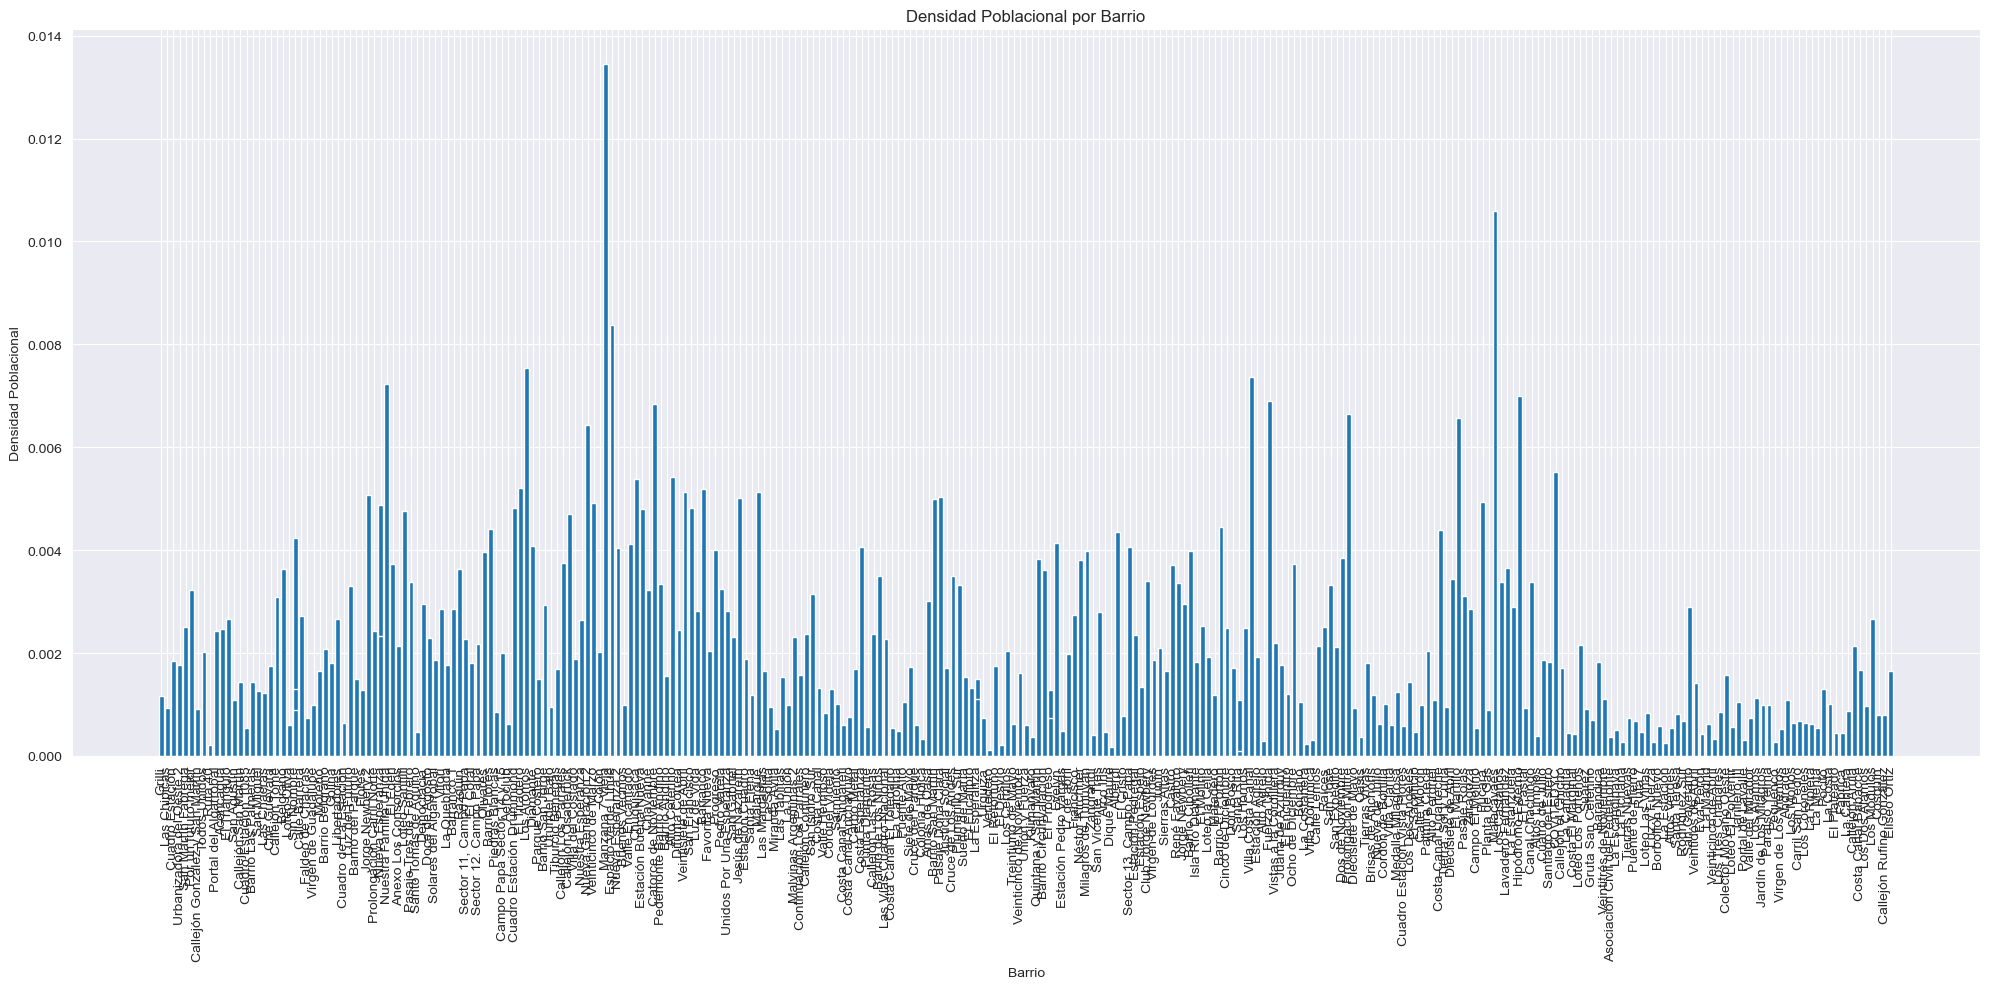

In [21]:
# Crear el gráfico de barras
plt.figure(figsize=(20, 10))
plt.bar(nombres_barrios, densidad_poblacional)
plt.xlabel('Barrio')
plt.ylabel('Densidad Poblacional')
plt.title('Densidad Poblacional por Barrio')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [22]:
valores_unicos = mendoza_data['tipo_propiedad_alquilada'].unique()
print(valores_unicos)

[14  0  1  3  2  5  4  6 11 15 18 10]


In [23]:
valores_unicos_ = mendoza_data['tipo_propiedad_prestada'].unique()
print(valores_unicos_)

[26  3  0  1 14  5  2  8 11  4 13  7  9  6 12 15 10 19 17 31]


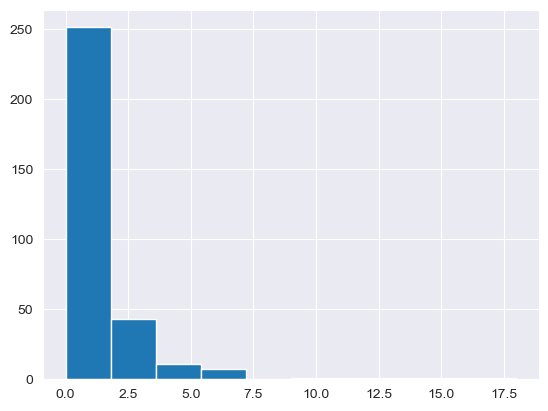

In [24]:
mendoza_data['tipo_propiedad_alquilada'].hist()
plt.show()

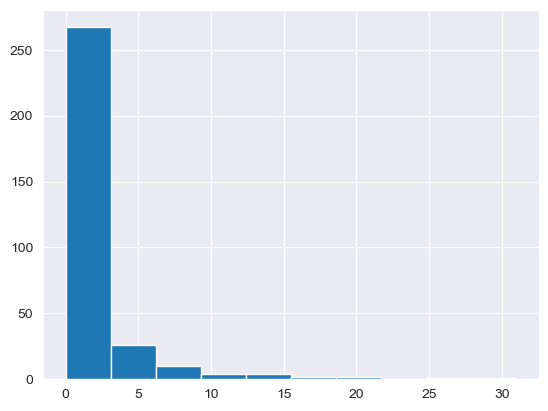

In [25]:
mendoza_data['tipo_propiedad_prestada'].hist()
plt.show()

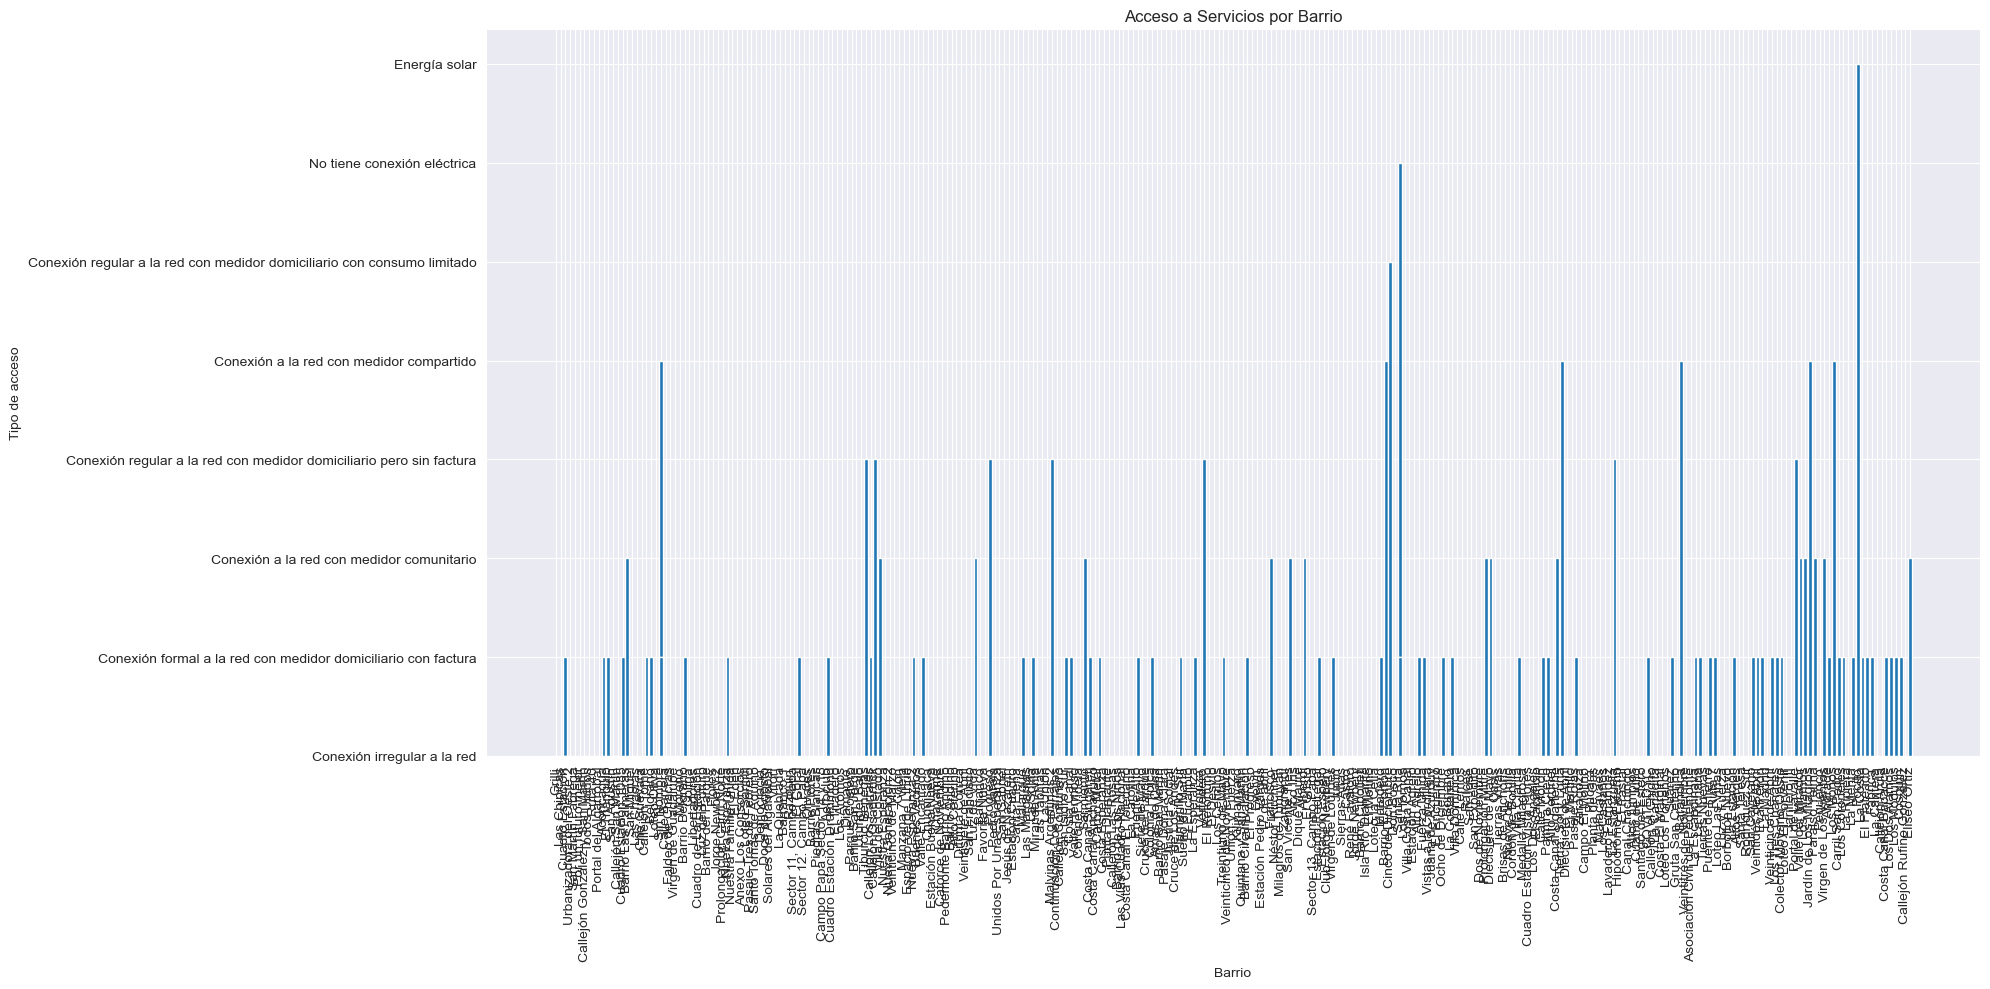

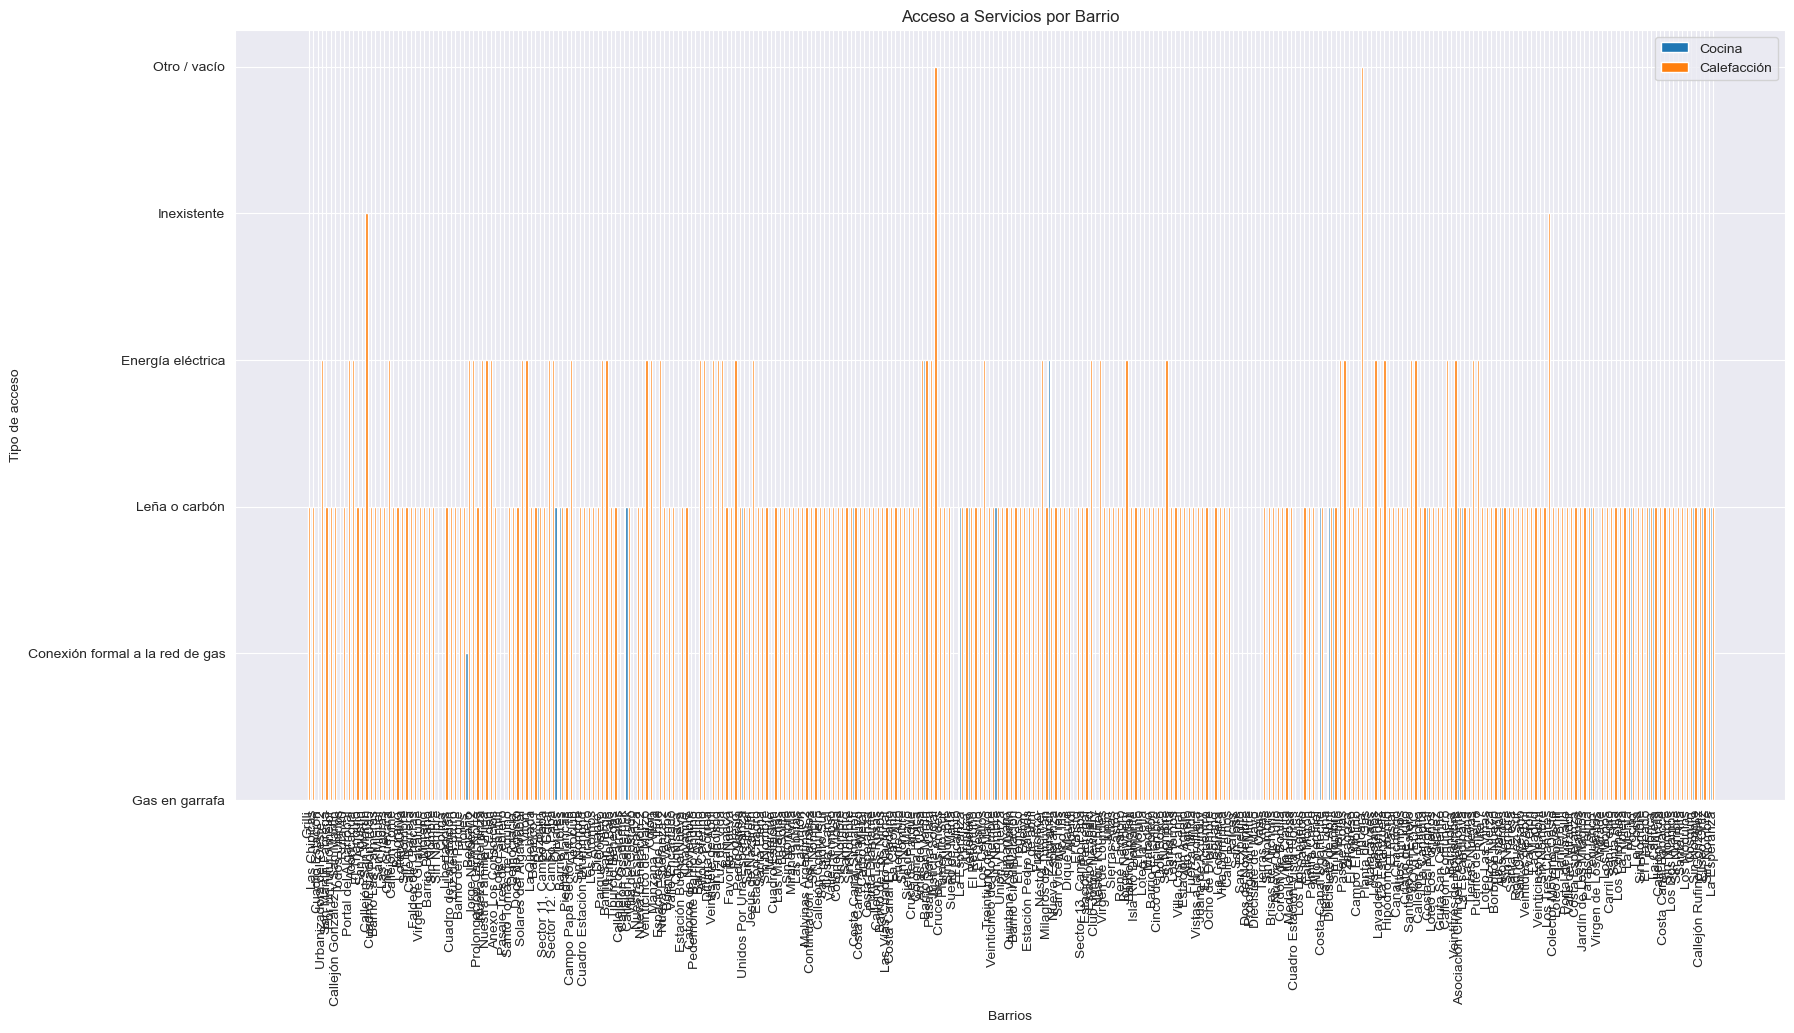

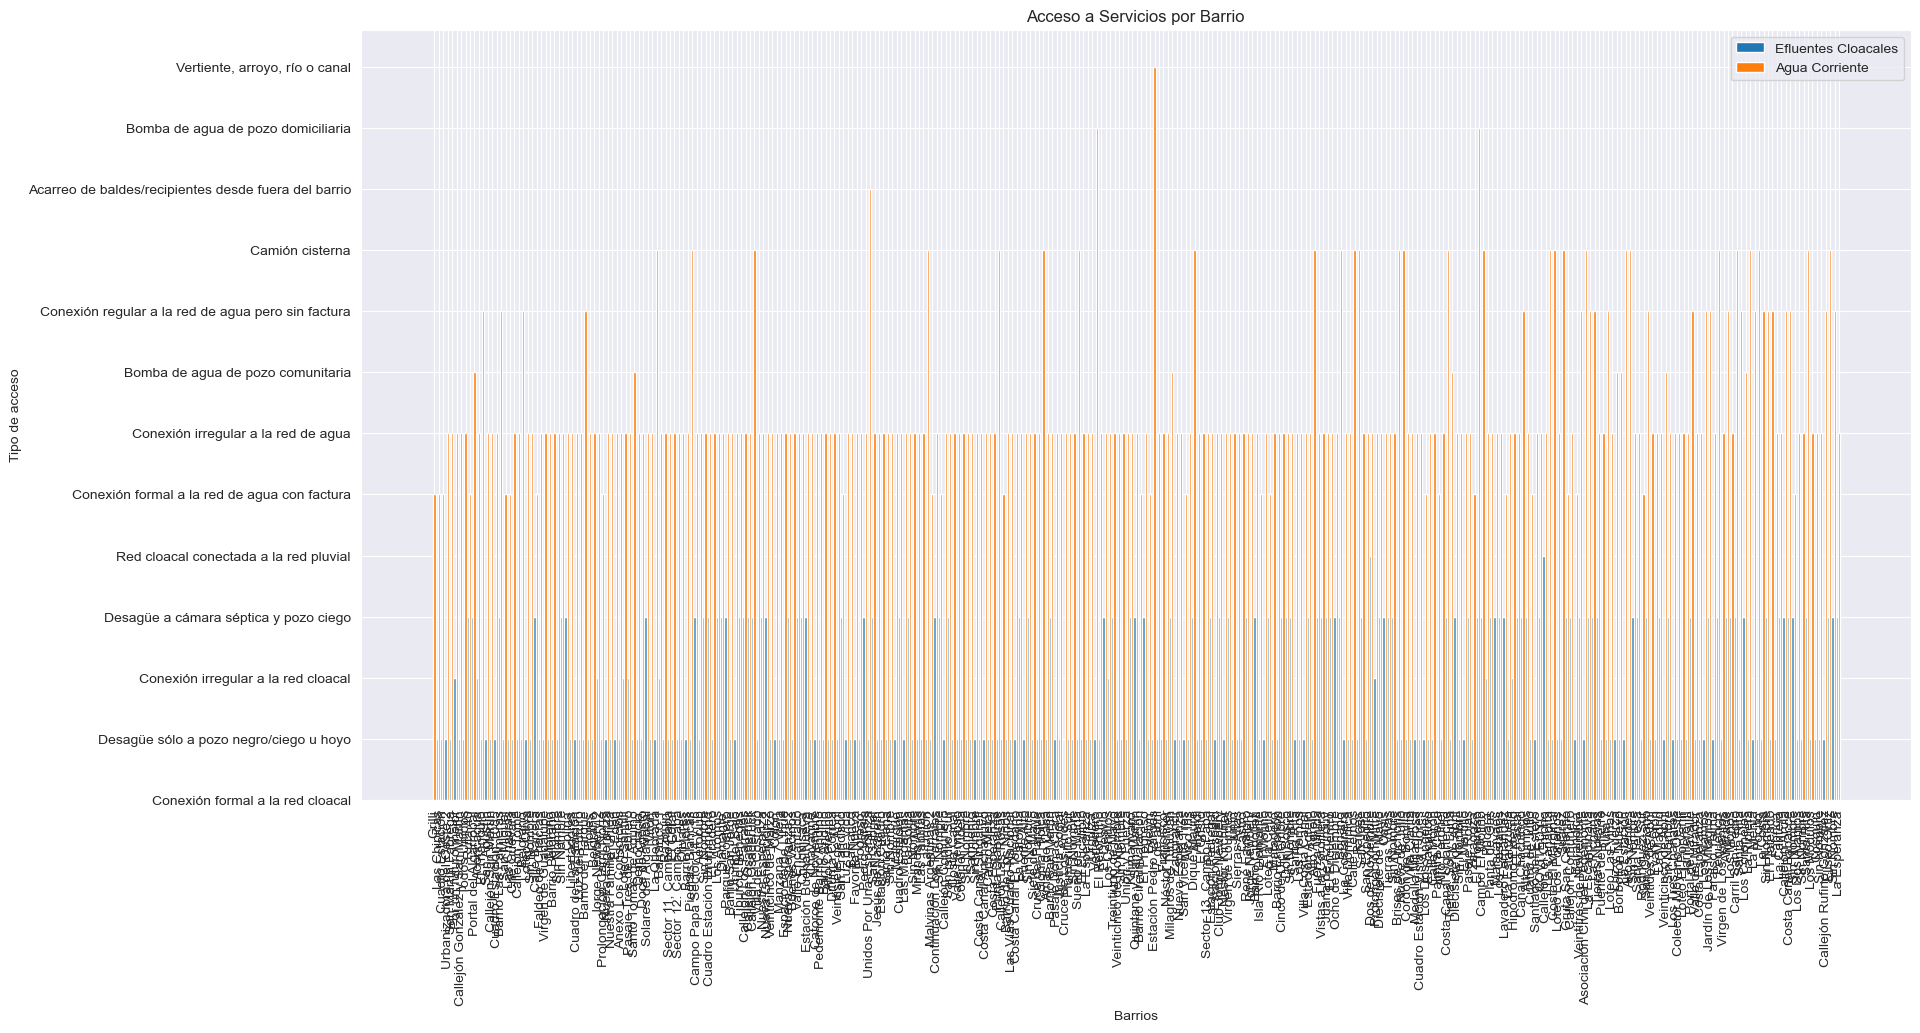

In [26]:
# Definimos variables
nombres_barrios = mendoza_data['nombre_barrio']
energia_electrica = mendoza_data['energia_electrica']
efluentes_cloacales = mendoza_data['efluentes_cloacales']
agua_corriente = mendoza_data['agua_corriente']
cocina = mendoza_data['cocina']
calefaccion = mendoza_data['calefaccion']



# Crear el gráfico de barras
plt.figure(figsize=(20, 10))
plt.bar(nombres_barrios, energia_electrica)
plt.xlabel('Barrio')
plt.ylabel('Tipo de acceso')
plt.title('Acceso a Servicios por Barrio')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

plt.figure(figsize=(20, 10))
posicion = np.arange(len(nombres_barrios))
ancho = 0.5 # Ancho de cada barra
plt.bar(posicion + 1*ancho, cocina, width=ancho, label='Cocina')
plt.bar(posicion + 2*ancho, calefaccion, width=ancho, label='Calefacción')
plt.xlabel('Barrios')
plt.ylabel('Tipo de acceso')
plt.title('Acceso a Servicios por Barrio')
plt.xticks(posicion + 2*ancho, nombres_barrios)
plt.xticks(rotation=90)
plt.legend()
plt.show()


plt.figure(figsize=(20, 10))
posicion = np.arange(len(nombres_barrios))
ancho = 0.5 # Ancho de cada barra
plt.bar(posicion + 1*ancho, efluentes_cloacales, width=ancho, label='Efluentes Cloacales')
plt.bar(posicion + 2*ancho, agua_corriente, width=ancho, label='Agua Corriente')
plt.xlabel('Barrios')
plt.ylabel('Tipo de acceso')
plt.title('Acceso a Servicios por Barrio')
plt.xticks(posicion + 2*ancho, nombres_barrios)
plt.xticks(rotation=90)
plt.legend()
plt.show()

Con estos gráficos buscamos responder la última de nuestras preguntas, ¿Cuáles son las condiciones de accesos a servicios básicos de los barrios populares analizados? En esta oportunidad tomamos los datos de las columnas con sus respectivas categorías y los cruzamos con los barrios. Es aquí cuando surge el desafío más importante, al intentar graficar los datos, nos encontramos con demasiada información y redundancias, haciendo ilegible el gráfico. Como solución encontramos el agrupar los tipos de acceso por categoría y graficarlos. Llegamos a la conclusión que la mayoría de los barrios tiene conexión irregular a la red de energía eléctrica, siendo este el medio de calefacción más utilizado. También identificamos que la mayoría de las viviendas de los barrios populares tiene acceso a agua potable, mediante conexión irregular, y el medio para cocinar sus alimentos es por gas envasado.